In [137]:
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt

In [153]:
class eye_to_ear:
    def __init__(self, mapname):
        try:
            df = pd.read_csv(mapname, header=None)
        except:
            print("error: wrong mapname")
            sys.exit()
        self.mapdata = df.values
    
    def show_map(self):
        print(self.mapdata)
    
    def set_pos(self, x, y):
        try:
            print("now_pos = ("+str(x)+","+str(y)+")")
            print("now_height =", self.mapdata[y, x])
            self.pos = np.array([x, y], dtype="float64")
            self.eye_h = self.mapdata[y,x] + 2
        except:
            print("error: wrong position")
            
    def set_angle(self, deg):
        if deg < 0 or 360 <= deg:
            print("error: angle must be [0,360)")
            return
        print("now_angle =", deg)
        self.deg = deg
        
    def scan(self):
        self.disdata = []
        try:
            pos = self.pos.copy()
            acc = np.array([np.sin(np.pi*self.deg/180), -1*np.cos(np.pi*self.deg/180)])
        except ValueError:
            print("error: position or angle is not defined")
            return

        for ele in range(0,180):
            pos_3d = np.append(pos, self.eye_h)
            acc_3d = acc * np.sin(np.pi*ele/180)
            acc_3d = np.append(acc_3d, -1*np.cos(np.pi*ele/180)) * 0.1
            #print(acc_3d, np.linalg.norm(acc_3d))
            
            dis = 0
            try:
                while(dis < 100):
                    if self.mapdata[int(pos_3d[1]), int(pos_3d[0])] > pos_3d[2]:
                        print(ele, pos_3d)
                        break
                    dis += 0.1
                    pos_3d += acc_3d
            except:
                print(ele, "exception")

            self.disdata.append(dis)

        x_axis = np.arange(0, len(self.disdata))
        plt.figure()
        plt.plot(x_axis, self.disdata)
        plt.show()

now_pos = (5,0)
now_height = 1
now_angle = 90
0 [5. 0. 1.]
1 [ 5.03665005e+00 -2.24416854e-18  9.00319840e-01]
2 [ 5.07328894e+00 -4.48765348e-18  9.01279263e-01]
3 [ 5.10990551e+00 -6.72977144e-18  9.02877977e-01]
4 [ 5.14648859e+00 -8.96983944e-18  9.05115494e-01]
5 [ 5.18302706e+00 -1.12071751e-17  9.07991134e-01]
6 [ 5.21950977e+00 -1.34410970e-17  9.11504020e-01]
7 [ 5.25592562e+00 -1.56709246e-17  9.15653082e-01]
8 [ 5.29226351e+00 -1.78959787e-17  9.20437056e-01]
9 [ 5.32851238e+00 -2.01155815e-17  9.25854485e-01]
10 [ 5.36466117e+00 -2.23290569e-17  9.31903719e-01]
11 [ 5.40069889e+00 -2.45357307e-17  9.38582915e-01]
12 [ 5.43661455e+00 -2.67349306e-17  9.45890038e-01]
13 [ 5.47239721e+00 -2.89259868e-17  9.53822864e-01]
14 [ 5.50803598e+00 -3.11082319e-17  9.62378975e-01]
15 [ 5.54351999e+00 -3.32810011e-17  9.71555765e-01]
16 [ 5.57883845e+00 -3.54436326e-17  9.81350439e-01]
17 [ 5.61398058e+00 -3.75954676e-17  9.91760012e-01]
18 [ 5.67983739e+00 -4.16280340e-17  9.07675664e-

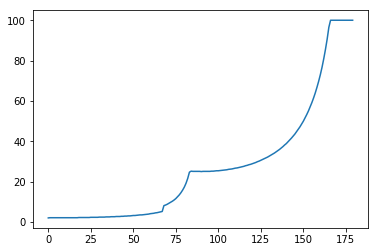

In [155]:
ete = eye_to_ear("station_platform.csv")
ete.set_pos(5,0)
ete.set_angle(90)
ete.scan()

In [156]:
ete.show_map()

[[1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 ...
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]]
